https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz

In [1]:
# Put file path as a string here
CIFAR_DIR = 'cifar-100/cifar-100-python/'

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        cifar_dict = pickle.load(fo, encoding='bytes')
    return cifar_dict

In [3]:
dirs = ['meta','test',
        'train']

In [4]:
all_data = [0,1,2]

In [5]:
for i,direc in zip(all_data,dirs):
    all_data[i] = unpickle(CIFAR_DIR+direc)

In [6]:
batch_meta = all_data[0]
data_test = all_data[1]
data_train = all_data[2]


In [7]:
batch_meta

{b'fine_label_names': [b'apple',
  b'aquarium_fish',
  b'baby',
  b'bear',
  b'beaver',
  b'bed',
  b'bee',
  b'beetle',
  b'bicycle',
  b'bottle',
  b'bowl',
  b'boy',
  b'bridge',
  b'bus',
  b'butterfly',
  b'camel',
  b'can',
  b'castle',
  b'caterpillar',
  b'cattle',
  b'chair',
  b'chimpanzee',
  b'clock',
  b'cloud',
  b'cockroach',
  b'couch',
  b'crab',
  b'crocodile',
  b'cup',
  b'dinosaur',
  b'dolphin',
  b'elephant',
  b'flatfish',
  b'forest',
  b'fox',
  b'girl',
  b'hamster',
  b'house',
  b'kangaroo',
  b'keyboard',
  b'lamp',
  b'lawn_mower',
  b'leopard',
  b'lion',
  b'lizard',
  b'lobster',
  b'man',
  b'maple_tree',
  b'motorcycle',
  b'mountain',
  b'mouse',
  b'mushroom',
  b'oak_tree',
  b'orange',
  b'orchid',
  b'otter',
  b'palm_tree',
  b'pear',
  b'pickup_truck',
  b'pine_tree',
  b'plain',
  b'plate',
  b'poppy',
  b'porcupine',
  b'possum',
  b'rabbit',
  b'raccoon',
  b'ray',
  b'road',
  b'rocket',
  b'rose',
  b'sea',
  b'seal',
  b'shark',
  b'shre

In [8]:
len(batch_meta[b'fine_label_names'])

100

In [9]:
data_test.keys()

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

### Display a single image using matplotlib.

** Grab a single image from data_batch1 and 

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [11]:
X = data_train[b"data"] 

In [12]:
np.shape(X)

(50000, 3072)

In [13]:
np.sqrt(3072)

55.42562584220407

In [14]:
3072/64

48.0

In [15]:
X[0].reshape(-1,64)

array([[255, 255, 255, ..., 170, 161, 146],
       [255, 254, 255, ..., 167, 149, 120],
       [255, 254, 255, ..., 156, 154, 157],
       ...,
       [ 94,  92,  94, ...,  26,  30,  47],
       [ 65,  64,  69, ...,   1,  15,  20],
       [ 66,  58,  71, ...,  10,  59,  79]], dtype=uint8)

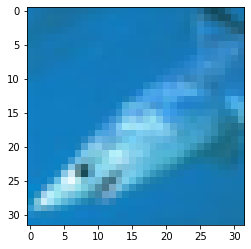

In [18]:
plt.imshow(X[50].reshape(3,32,32).transpose(1,2,0))

In [ ]:
1536.0

In [19]:
X = X.reshape(50000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

In [20]:
X[0].max()

255

In [21]:
(X[0]/255).max()

1.0

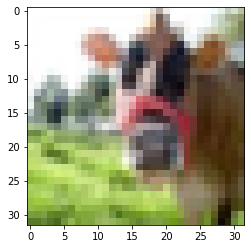

In [22]:
plt.imshow(X[0]);

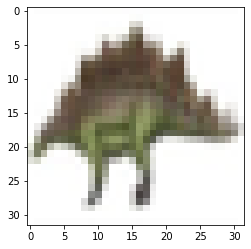

In [23]:
plt.imshow(X[1]);

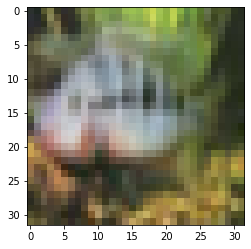

In [24]:
plt.imshow(X[4])

# Helper Functions for Dealing With Data.

** Use the provided code below to help with dealing with grabbing the next batch once you've gotten ready to create the Graph Session. Can you break down how it works? **

In [25]:
def one_hot_encode(vec, vals=100):
    '''
    For use to one-hot encode the 10- possible labels
    '''
    n = len(vec)
    out = np.zeros((n, vals))
    out[range(n), vec] = 1
    return out

In [26]:
class CifarHelper():
    
    def __init__(self):
        self.i = 0
        
        self.all_train_batches = [data_train]
        self.test_batch = [data_train]
        
        self.training_images = None
        self.training_labels = None
        
        self.test_images = None
        self.test_labels = None
    
    def set_up_images(self):
        
        print("Setting Up Training Images and Labels")
        
        self.training_images = np.vstack([d[b"data"] for d in self.all_train_batches])
        train_len = len(self.training_images)
        
        self.training_images = self.training_images.reshape(train_len,3,32,32).transpose(0,2,3,1)/255
        self.training_labels = one_hot_encode(np.hstack([d[b"coarse_labels"] for d in self.all_train_batches]), 100)
        
        print("Setting Up Test Images and Labels")
        
        self.test_images = np.vstack([d[b"data"] for d in self.test_batch])
        test_len = len(self.test_images)
        
        self.test_images = self.test_images.reshape(test_len,3,32,32).transpose(0,2,3,1)/255
        self.test_labels = one_hot_encode(np.hstack([d[b"coarse_labels"] for d in self.test_batch]), 100)

        
    def next_batch(self, batch_size):
        x = self.training_images[self.i:self.i+batch_size].reshape(100,32,32,3)
        y = self.training_labels[self.i:self.i+batch_size]
        self.i = (self.i + batch_size) % len(self.training_images)
        return x, y

** How to use the above code: **

In [27]:
# Before Your tf.Session run these two lines
ch = CifarHelper()
ch.set_up_images()

# During your session to grab the next batch use this line
# (Just like we did for mnist.train.next_batch)
# batch = ch.next_batch(100)

Setting Up Training Images and Labels
Setting Up Test Images and Labels


## Creating the Model

** Import tensorflow **

In [28]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


** Create 2 placeholders, x and y_true. Their shapes should be: **

* x shape = [None,32,32,3]
* y_true shape = [None,100]


In [30]:
x = tf.placeholder(tf.float32,shape=[None,32,32,3])
y_true = tf.placeholder(tf.float32,shape=[None,100])

** Create one more placeholder called hold_prob. No need for shape here. This placeholder will just hold a single probability for the dropout. **

In [31]:
hold_prob = tf.placeholder(tf.float32)

### Helper Functions

** Grab the helper functions from MNIST with CNN (or recreate them here yourself for a hard challenge!). You'll need: **

* init_weights
* init_bias
* conv2d
* max_pool_2by2
* convolutional_layer
* normal_full_layer

In [32]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1],
                        padding='SAME')

def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1],
                          padding='SAME')

def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

### Create the Layers

** Create a convolutional layer and a pooling layer as we did for MNIST. **
** Its up to you what the 2d size of the convolution should be, but the last two digits need to be 3 and 32 because of the 3 color channels and 32 pixels. So for example you could use:**

        convo_1 = convolutional_layer(x,shape=[4,4,3,32])

In [33]:
convo_1 = convolutional_layer(x,shape=[4,4,3,32])
convo_1_pooling = max_pool_2by2(convo_1)

** Create the next convolutional and pooling layers.  The last two dimensions of the convo_2 layer should be 32,64 **

In [34]:
convo_2 = convolutional_layer(convo_1_pooling,
                              shape=[4,4,32,64])
convo_2_pooling = max_pool_2by2(convo_2)

In [35]:
convo_2_1 = convolutional_layer(convo_2_pooling,
                              shape=[4,4,64,64])

** Now create a flattened layer by reshaping the pooling layer into [-1,8 \* 8 \* 64] or [-1,4096] **

In [36]:
8*8*64

4096

In [37]:
convo_2_flat = tf.reshape(convo_2_1,[-1,8*8*64])

** Create a new full layer using the normal_full_layer function and passing in your flattend convolutional 2 layer with size=1024. (You could also choose to reduce this to something like 512)**

In [38]:
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,
                                              2048))

** Now create the dropout layer with tf.nn.dropout, remember to pass in your hold_prob placeholder. **

In [39]:
full_one_dropout = tf.nn.dropout(full_layer_one,
                                 keep_prob=hold_prob)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


** Finally set the output to y_pred by passing in the dropout layer into the normal_full_layer function. The size should be 10 because of the 10 possible labels**

In [41]:
y_pred = normal_full_layer(full_one_dropout,100)

### Loss Function

** Create a cross_entropy loss function **

In [42]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(
        labels=y_true,logits=y_pred))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### Optimizer
** Create the optimizer using an Adam Optimizer. **

In [43]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cross_entropy)

** Create a variable to intialize all the global tf variables. **

In [44]:
init = tf.global_variables_initializer()

## Graph Session

** Perform the training and test print outs in a Tf session and run your model! **

In [ ]:
with tf.Session() as sess:
    sess.run(init)

    for i in range(900):
        batch = ch.next_batch(100)
        sess.run(train, feed_dict={x: batch[0], 
                                   y_true: batch[1],
                                   hold_prob: 0.5})
        
        # PRINT OUT A MESSAGE EVERY 100 STEPS
        if i%100 == 0:
            
            print('Currently on step {}'.format(i))
            print('Accuracy is:')
            # Test the Train Model
            matches = tf.equal(tf.argmax(y_pred,1),
                               tf.argmax(y_true,1))

            acc = tf.reduce_mean(tf.cast(matches,tf.float32))

            print(sess.run(acc,feed_dict={
                x:ch.test_images,
                y_true:ch.test_labels,
                hold_prob:1.0}))
            print('\n')
    print('Currently on step {}'.format(i))
    print('Accuracy is:')
    # Test the Train Model
    matches = tf.equal(tf.argmax(y_pred,1),
                       tf.argmax(y_true,1))

    acc = tf.reduce_mean(tf.cast(matches,tf.float32))

    print(sess.run(acc,feed_dict={
        x:ch.test_images,
        y_true:ch.test_labels,
        hold_prob:1.0}))
    print('\n')